*Think Linear Algebra* is not for sale yet, but if you would like to support this project, you can [buy me a coffee](https://buymeacoffee.com/allendowney).

# Projection

This chapter is about one of the most important ideas in linear algebra, projection, and the operation use to compute it, the dot product.

To sneak up on the idea of projection, we'll start by converting a vector from Cartesian to polar coordinates and back.
From there, we'll define projection geometrically and compute it with polar coordinates.
Then we'll compute it again in Cartesian coordinates, and show the the result is the dot product.

We'll take a small detour to construct a rotation matrix and use it to compute perpendicular vectors.

And then, to apply what we've learned, we'll learn to play pool!

[Click here to run this notebook on Colab](https://colab.research.google.com/github/AllenDowney/ThinkLinearAlgebra/blob/main/nb/dot.ipynb).

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from os.path import basename, exists


def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)


download("https://github.com/AllenDowney/ThinkLinearAlgebra/raw/main/utils.py")

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from utils import decorate, remove_spines
from utils import plot_vector, plot_vectors, plot_rejection

In [4]:
from utils import set_precision

set_precision(4)

## Polar Coordinates

Let's start with a two-dimensional vector, `a`.

In [5]:
x, y = 1.2, 2.7
a = np.array([x, y])
a

array([1.2, 2.7])

Here's the graphical representation of this vector as an arrow with its tail at the origin and its head at the point $(1.2, 2.7)$ in Cartesian coordinates. 

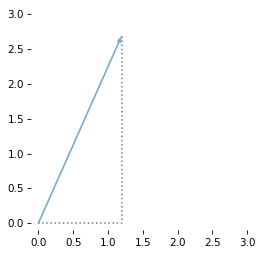

In [6]:
plot_vectors(a)
plt.plot([0, x, x], [0, 0, y], ':', color='gray')
lim = [-0.1, 3.1]
decorate(aspect='equal', xlim=lim, ylim=lim)
remove_spines()

To compute the length of this vector, we can use the Pythagorean formula to compute the hypotenuse of a right triangle with side lengths $x$ and $y$.

In [7]:
x, y = a
np.sqrt(x**2 + y**2)

2.9547

Or the `hypot` function does the same thing.

In [8]:
np.hypot(x, y)

2.9547

The length of a vector is called a **norm** -- to be more precise, the length we computed is the 2-norm because the components were squared.
NumPy provides a function that computes norms.

In [9]:
from numpy.linalg import norm

norm(a)

2.9547

To represent the direction of the vector, we'll use the angle it forms with the positive $x$ axis, which we can compute using the inverse tangent function, `arctan2`.

In [10]:
phi = np.arctan2(y, x)
phi

1.1526

The length and angle we just computed represent the vector in polar coordinates.
We'll use the following function to convert from Cartesian to polar coordinates.

In [11]:
def cart2pol(v):
    x, y = np.transpose(v)
    r = np.hypot(x, y)
    phi = np.arctan2(y, x)
    return r, phi

Here's the polar representation of `a`.

In [12]:
r, phi = cart2pol(a)
r, phi

(2.9547, 1.1526)

The polar representation makes it easier to perform certain computations -- one example is projection.

## Projection With Polar Coordinates

Projection might be the most important idea in linear algebra.
To introduce the idea, we'll start by computing the **scalar projection** of `a` onto the $x$ axis, which you can think of as the shadow `a` would cast on the $x$ axis if lighted from above.
By the rules of trigonometry, we can compute it like this.

In [13]:
scalar_proj_x = r * np.cos(phi)
scalar_proj_x

1.2000

Similarly, we can compute the projection of `a` onto the $y$ axis.

In [14]:
scalar_proj_y = r * np.sin(phi)
scalar_proj_y

2.7000

You might notice that these scalar projection are the coordinates of `a`.
So we have found a way to convert polar to Cartesian coordinates, which we can wrap in a function.

In [15]:
def pol2cart(r, phi):
    return r * np.array([np.cos(phi), np.sin(phi)])

And confirm that we get back the vector we started with.

In [16]:
pol2cart(r, phi)

array([1.2, 2.7])

So far, we converted `a` from Cartesian to polar coordinates and then back to Cartesian coordinates.

Now let's do something more useful, projecting one vector onto another.
To demonstrate, here's another vector, `b`, in Cartesian coordinates.

In [17]:
b = np.array([3, 1])

Here's a graphical representation of `a` and `b`, and a dotted line that shows a perpendicular dropped from `a` onto `b`.
Where this perpendicular lands on `b` is the projection of `a` on `b`.

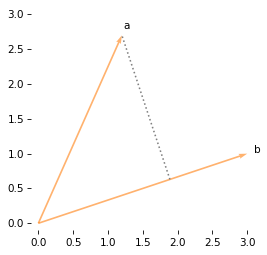

In [18]:
plot_vectors([a, b], color='C1', labels='ab')
plot_rejection(a, b)
decorate(aspect='equal', xlim=lim, ylim=lim)
remove_spines()

One way to compute this projection is to find the angle between `a` and `b`, and use trigonometry to compute the length of the projection.

To find the angle, we'll convert `b` and `a` to polar coordinates.

In [19]:
rs, phis = cart2pol([a, b])
phis

array([1.1526, 0.3218])

`phis` contains two angles: from `a` to the $x$ axis, and from `b` to the $x$ axis.

In [20]:
-np.diff(phis)

array([0.8308])

So the difference is the angle between the vectors -- which the following function computes.

In [21]:
def angle_between(a, b):
    rs, phis = cart2pol([a, b])
    return -np.diff(phis)

In [22]:
theta = angle_between(a, b)
theta

array([0.8308])

If you look again at the previous figure, you'll see that `theta` is the angle of a right triangle whose hypotenuse is the length of `a`.
So the length of the adjacent side is $\|a\| \cos \theta$.

In [23]:
comp_a_on_b = norm(a) * np.cos(theta)
comp_a_on_b

array([1.9922])

The result is the scalar projection of `a` on `b`, also called the **component** of `a` in the direction of `b`.

Now, to find the **vector projection**, we can multiply the scalar projection by a unit vector in the direction of `b`.

In [24]:
b_hat = b / norm(b)
proj_a_on_b = comp_a_on_b * b_hat
proj_a_on_b

array([1.89, 0.63])

The following figure shows the result.

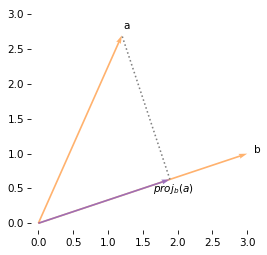

In [25]:
plot_vectors([a, b], color='C1', labels='ab')
plot_rejection(a, b)
plot_vector(proj_a_on_b, color='C4', alpha=0.9, label='$proj_b(a)$', label_pos=1)
decorate(aspect='equal', xlim=lim, ylim=lim)
remove_spines()

To summarize, if we have vectors in polar coordinates, we can compute the projection of one vector onto the other by computing the angle between them and using trigonometry.

But what if we have vectors in Cartesian coordinates?

## Projection With Cartesian Coordinates

If we have `a` and `b` in Cartesian coordinates, we can compute the projection of `a` on `b` by converting both to polar coordinates, subtracting their angles, and computing $\|a\| \cos \phi$
But there's a better way, which we'll discover with some help from SymPy.

Let's define symbolic versions of the vectors `b` and `a`.

In [26]:
import sympy as sp

ax, ay, bx, by = sp.symbols('a_x a_y b_x b_y', real=True)

a_sym = sp.Matrix([ax, ay])
b_sym = sp.Matrix([bx, by])
b_sym

Matrix([
[b_x],
[b_y]])

And convert them to polar coordinates.

In [27]:
r_a = a_sym.norm()
phi_a = sp.atan2(ay, ax)

r_b = b_sym.norm()
phi_b = sp.atan2(by, bx)

Here's the length of `b`.

In [28]:
r_b

sqrt(b_x**2 + b_y**2)

And its angle.

In [29]:
phi_b

atan2(b_y, b_x)

Now we can compute the scalar projection of `a` onto `b`.

In [30]:
proj_expr = r_a * sp.cos(phi_a - phi_b)
proj_expr

sqrt(a_x**2 + a_y**2)*cos(atan2(a_y, a_x) - atan2(b_y, b_x))

This expression applies a trig function (cosine) to the inverse of another trig function (tangent) -- which suggests that there might be a simpler form.
Fortunately, SymPy knows the trigonometric identities, and it can simplify the expression.

In [31]:
proj_expr.simplify()

(a_x*b_x + a_y*b_y)/sqrt(b_x**2 + b_y**2)

That looks very different!

The numerator of this expression is the dot product of `a` and `b`, and the denominator is the norm of `b`, so we can compute the scalar projection like this.

In [32]:
b_sym.dot(a_sym) / b_sym.norm()

(a_x*b_x + a_y*b_y)/sqrt(b_x**2 + b_y**2)

In math notation, the scalar projection of $a$ on $b$ is 

$$ \mathrm{comp}_b(a) = \frac{a \cdot b}{\|b\|} $$

Let's put that in a function we can use with NumPy arrays.

In [33]:
def scalar_projection(a, b):
    return np.dot(a, b) / norm(b)

If we test it with `a` and `b`, the result is what we got using polar coordinates.

In [34]:
comp_a_on_b = scalar_projection(a, b)
comp_a_on_b

1.9922

Similarly, we can use the following function to compute the vector projection.

In [35]:
def vector_projection(a, b):
    b_hat = b / norm(b)
    return np.dot(a, b_hat) * b_hat

And the result is what we got using polar coordinates.

In [36]:
proj_a_on_b = vector_projection(a, b)
proj_a_on_b

array([1.89, 0.63])

Notice that the dot product is commutative, so `b @ a` and `a @ b` are the same.

In [37]:
np.allclose(b @ a, a @ b)

True

But scalar projection is not commutative, so the projection of `b` onto `a` is not the same as the projection of `a` onto `b`.

In [38]:
scalar_projection(b, a), scalar_projection(a, b)

(2.1322, 1.9922)

The following figure shows the projection of `b` onto `a`, which is not the same length or direction as the projection of `a` onto `b`.

In [39]:
proj_b_on_a = vector_projection(b, a)

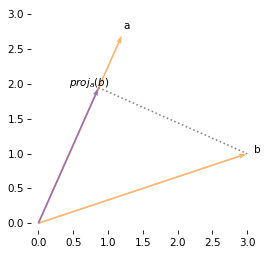

In [40]:
plot_vectors([a, b], color='C1', labels='ab')
plot_rejection(b, a)
plot_vector(proj_b_on_a, color='C4', alpha=0.9, label='$proj_a(b)$', label_pos=11)
decorate(aspect='equal', xlim=lim, ylim=lim)
remove_spines()

In summary, using polar coordinates and trigonometry, we found that we can write the scalar projection of $a$ onto $b$:

$$\mathrm{comp}_b(a) = \|a\| \cos \theta$$

where $\theta$ is the angle between the vectors.
With some help from SymPy, we proved that we can also compute the scalar projection using Cartesian coordinates:

$$\mathrm{comp}_b(a) = \frac{a \cdot b}{\|b\|}$$

Setting the right sides equal, and multiplying through by the norm of $b$, we have

$$ a \cdot b = \|a\| \, \|b\| \cos \theta $$

If $a$ and $b$ point in the same direction, $\theta$ is 0, so $\cos \theta$ is 1, and the dot product is the product of the lengths of the vectors.

If $a$ and $b$ are perpendicular, $\cos \theta$ is 0, and the dot product is 0.

## Vector Rejection

In some of the previous figures, I used a function called `plot_rejection` to draw a perpendicular line dropped from one vector to another.
That perpendicular is called the **vector rejection** because it represents the component of the vector that's left over if we subtract the vector projection.

In the example, we have computed the projection of `a` on `b`.

In [41]:
proj_a_on_b

array([1.89, 0.63])

So we can compute the rejection like this:

In [42]:
rej_a_on_b = a - proj_a_on_b

Here's what it looks like:

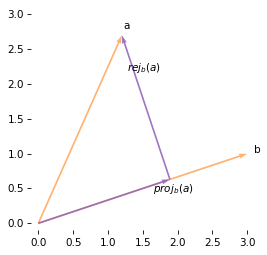

In [43]:
plot_vectors([a, b], color='C1', labels='ab')
plot_vector(proj_a_on_b, color='C4', alpha=0.9, label='$proj_b(a)$', label_pos=1)
plot_vector(rej_a_on_b, proj_a_on_b, color='C4', alpha=0.9, label='$rej_b(a)$', label_pos=2)
decorate(aspect='equal', xlim=lim, ylim=lim)
remove_spines()

And we can see that the original vector, `a`, is the sum of the projection and rejection.

## Rotation

In previous sections we computed the projection of one vector on another by converting to polar coordinates.
Then we used SymPy to work out the same operation with Cartesian coordinates.
We can use the same method to rotate a vector -- and we'll see later how useful that is.

For now, suppose we want to rotate a vector counter-clockwise by angle `theta` (in radians).

In [44]:
theta = sp.symbols('theta')
theta

theta

Since we already have the vector `b` in symbolic form, we'll use it again.

In [45]:
b_sym

Matrix([
[b_x],
[b_y]])

We'll convert it to polar coordinates.

In [46]:
r_b = b_sym.norm()
phi_b = sp.atan2(by, bx)

Now we can add `theta` to the angle of `b` and convert back to Cartesian coordinates.

In [47]:
x = r_b * sp.cos(phi_b + theta)
x

sqrt(b_x**2 + b_y**2)*cos(theta + atan2(b_y, b_x))

In [48]:
y = r_b * sp.sin(phi_b + theta)
y

sqrt(b_x**2 + b_y**2)*sin(theta + atan2(b_y, b_x))

Since those expressions contain sums of angles, we'll use the `expand_trig` function to expand the trigonometric functions and then `simplify` to compact them.

In [49]:
sp.expand_trig(x).simplify()

b_x*cos(theta) - b_y*sin(theta)

In [50]:
sp.expand_trig(y).simplify()

b_x*sin(theta) + b_y*cos(theta)

Now we can see that the coordinates of the rotated vector can be computed as a weighted sum of $b_x$ and $b_y$.
So if we put the weights in a matrix, we can express vector rotation using matrix multiplication.
Here's the rotation matrix.

In [51]:
R = sp.Matrix([[sp.cos(theta), -sp.sin(theta)],
               [sp.sin(theta),  sp.cos(theta)]])

R

Matrix([
[cos(theta), -sin(theta)],
[sin(theta),  cos(theta)]])

And here's the result when we multiply by $b$.

In [52]:
R @ b_sym

Matrix([
[b_x*cos(theta) - b_y*sin(theta)],
[b_x*sin(theta) + b_y*cos(theta)]])

We will use rotation matrices several times in later chapters.

We can use rotation to find a vector perpendicular to $b$, by rotating counter-clockwise by 90 degrees, or $\pi/2$ radians.

In [53]:
subs = {theta: sp.pi / 2}
subs

{theta: pi/2}

If we substitute this value into the rotation matrix, the result is pleasingly simple.

In [54]:
R.subs(subs)

Matrix([
[0, -1],
[1,  0]])

Here are the coordinates of the perpendicular vector.

In [55]:
x.subs(subs), y.subs(subs)

(-b_y, b_x)

The following function takes a vector and returns a perpendicular vector.

In [56]:
def vector_perpendicular(v):
    x, y = np.transpose(v)
    return np.array([-y, x])

Here's the vector perpendicular to `b`.

In [57]:
b_perp = vector_perpendicular(b)
b_perp

array([-1,  3])

And here's what it looks like.

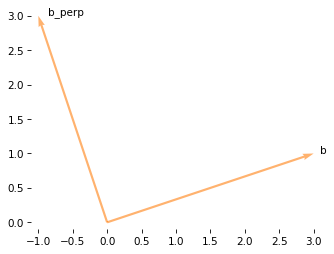

In [58]:
from utils import label_vector

plot_vector(b, color='C1', label='b')
plot_vector(b_perp, color='C1')
label_vector('b_perp', b_perp, label_pos=1, ha='left')
decorate(aspect='equal', xlim=[-1.1, 3.1], ylim=lim)
remove_spines()

To confirm that they are perpendicular, we can compute the dot product.

In [59]:
b @ b_perp

0

The result is zero, which indicates that the vectors are perpendicular.

At this point, we have all the tools we need to do something useful.

## Collisions

If you have ever played pool (or billiards) you are familiar with the behavior of rigid bodies when they collide.
Billiard balls on a smooth table are often described with a simple physical model of **elastic collision**, developed by Christian Huygens in the 1600s.

But before we get to the physics, let's set up the table.
The playing surface of standard tournament table has these dimensions in inches.

In [60]:
table_width = 100
table_height = 50

And standard pool balls have this diameter, also in inches.

In [61]:
ball_diameter = 2.25

As a first scenario, we'll place the cue ball at the center of the left half of the table, and a target ball at the center of the right half.
The following vectors represent these positions.

In [62]:
cue = np.array([25, 25])
target = np.array([75, 25])

Now we'll create a vector that represents the velocity of the cue ball, which is 12 inches per second at an angle slightly above the $x$ axis.
We'll define it in polar coordinates and then convert to Cartesian.

In [63]:
v1 = pol2cart(r=12, phi=0.033)
v1

array([11.9935,  0.3959])

And let's suppose the target ball is stationary, so its velocity is 0.
We can come back and change it later.

In [64]:
v2 = pol2cart(r=0, phi=0)
v2

array([0., 0.])

After some time, `t`, we can compute the distance the balls have traveled relative to their starting places.
For example, here are the distances after 4 seconds.

In [65]:
t = 4
d1 = v1 * t
d2 = v2 * t

And we can compute the positions of the balls like this.

In [66]:
pos1 = cue + d1
pos2 = target + d2

The following figure shows the table, the pockets, the positions of the two balls, and the distance traveled by the cue ball.

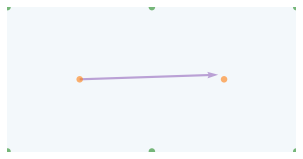

In [67]:
from utils import draw_table, draw_circles

draw_table()
plot_vector(d1, cue, color='C4')
draw_circles([cue, target])

Now let's see how close the cue is to the target ball.
We'll use this function to compute the length of the difference between two vectors.

In [68]:
def distance_between(pos1, pos2):
    return norm(pos1 - pos2)

Here's the final distance in this scenario.

In [69]:
distance_between(cue + d1, target + d2)

2.5716

And here's a zoomed in view showing the positions of the cue and target.

In [70]:
from utils import plot_vector

def draw_collision(t, cue, target, v1, v2, label=None):
    draw_table(ticks=True)
    pos1 = cue + v1 * t
    pos2 = target + v2 * t
    draw_circles([pos1, pos2])
    remove_spines()
    decorate(xlim=[60, 90], ylim=[15, 35])

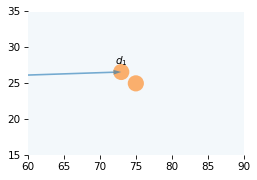

In [71]:
draw_collision(t, cue, target, v1, v2)
plot_vector(d1, cue, label='$d_1$', label_pos=11);

It looks as if the cue will hit the target if it keeps going in this direction.
In the next section, we'll check whether the balls will collide, and figure out their positions when they do.

## Collision Prediction

To check whether the balls will collide, we'll find the value of `t` that minimizes the distance between them.
Then we can check whether this distance is less than one diameter -- if it is, they collide.

The following function takes a hypothetical value of `t`, the starting positions of the balls, and their velocities.
It returns the distance between the final position of the cue and the target.

In [72]:
def objective_func(t, start1, start2, v1, v2):
    pos1 = start1 + v1 * t
    pos2 = start2 + v2 * t
    return distance_between(pos1, pos2)

We can invoke the function directly.

In [73]:
objective_func(t, cue, target, v1, v2)

2.5716

But it is meant to be used with the `minimize_scalar` function, which searches for the value of `t` that minimizes the distance between the balls.

In [74]:
from scipy.optimize import minimize_scalar


def minimize_distance(start1, start2, v1, v2):
    args = (start1, start2, v1, v2)

    relative_speed = norm(v1 - v2)
    upper = distance_between(start1, start2) / relative_speed
    min_soln = minimize_scalar(
        objective_func, bounds=(0, upper), args=args, method="bounded"
    )

    assert min_soln.success
    return min_soln

To put an upper bound on the time until the collision, we compute the relative speed of the two balls, which is the length of the difference in velocities.

In [75]:
relative_speed = norm(v1 - v2)
relative_speed

12.0000

The time until the balls collide, if they do, can't be longer than the initial distance between them divided by this speed.

Now here's how we call `minimize_distance`.

In [76]:
min_soln = minimize_distance(cue, target, v1, v2)

The result is an `OptimizeResult` object that contains a message indicating whether the algorithm found a minimum within the bounds it searched.

In [77]:
min_soln.message

'Solution found.'

The `x` attribute contains the time that minimizes the distance.

In [78]:
t_min = min_soln.x
t_min

4.1644

And `fun` contains the objective function evaluated at `x`, which is the distance between balls.

In [79]:
min_soln.fun

1.6497

If this value is smaller than twice the radius (which is the diameter), that means the balls collide.
We'll use this function to check.

In [80]:
def will_hit(start1, start2, v1, v2, thresh):
    min_soln = minimize_distance(start1, start2, v1, v2)
    return min_soln.fun < thresh

With the initial direction we chose, the balls collide.

In [81]:
will_hit(cue, target, v1, v2, ball_diameter)

True

Here's what it looks like when the distance between balls is minimized.

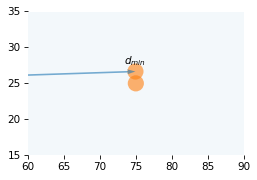

In [82]:
d_min = v1 * t_min
draw_collision(t_min, cue, target, v1, v2)
plot_vector(d_min, cue, label='$d_{min}$', label_pos=11);

The minimal distance tells us whether the balls will collide, but not when they will collide. For that, we have to do one more search.

## Collision Detection

To detect the instant the balls collide, we'll search for the value if `t` where the distance between the balls is exactly one diameter, which means they are in contact.

The following function takes as arguments a hypothetical time in seconds, the starting positions of the balls, their velocities, and the distance between them we are searching for.
It returns an error, which is the difference between the computed distance and the goal distance.

In [83]:
def error_func(t, start1, start2, v1, v2, goal_distance):
    actual_distance = objective_func(t, start1, start2, v1, v2)
    return actual_distance - goal_distance

For example, if we call it with the initial guess for `t`, we find that we are off by about a third of a second.

In [84]:
error_func(t, cue, target, v1, v2, ball_diameter)

0.3216

We can search more efficiently if we can provide a lower and upper bound on the solution.
As an upper bound, we'll use `t_min`, which we know is too far.
For the lower bound, we'll use `0` -- we could provide a tighter bound, but it's not necessary.

In [85]:
lower = 0
upper = t_min

Now we can use `root_scalar` to search for the value of `t` that makes the distance between balls exactly one diameter.

In [86]:
from scipy.optimize import root_scalar

args = (cue, target, v1, v2, ball_diameter)
root_soln = root_scalar(error_func, bracket=[lower, upper], args=args, method="brentq")

The result is a `RootResults` object that contains a flag that indicates whether the search converged to a solution.

In [87]:
root_soln.flag

'converged'

The `root` attribute contains the value of `t` at the instant of collision.

In [88]:
t_coll = root_soln.root
t_coll

4.0369

We can use to compute the offset vector.

In [89]:
d_soln = t_coll * v1

And here's what it looks like at the instant of collision.

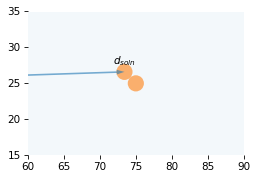

In [90]:
draw_collision(t_coll, cue, target, v1, v2)
plot_vector(d_soln, cue, label='$d_{soln}$', label_pos=11);

Now let's figure out what happens after the collision.

## Elastic Collision

In a perfectly elastic collision, total energy is conserved, but momentum is transferred from one body to another.
In the real world, collisions are not perfectly elastic, but for rigid bodies like pool balls, it's not a bad model.

When a ball with velocity $v_1$ collides with another ball with velocity $v_2$, we can figure out the velocities of both balls, after the collision, by following these steps.

1. Find a unit vector on the line of impact -- that is, the line between the centers of the balls.

2. Compute the projection of both velocities onto this vector, and the rejection of both velocities, perpendicular to this vector.

3. If the balls have the same mass (which is close to true in tournament play), the components of the velocities along the center line are exchanged, and the perpendicular components are unaffected.

That's the general idea -- now let's see the details.
First, here are the positions of the balls at the point of impact.

In [91]:
pos1 = cue + v1 * t_coll
pos2 = target + v2 * t_coll

And here's a unit vector on the line between the centers of the balls.
It's called the **normal vector** because it's perpendicular -- in other words, normal to -- the contact surface between the balls.
We'll call it `n_hat`, where `n` stands for "normal" and `hat` indicates that it's a unit vector.

In [92]:
from utils import normalize

n_hat = normalize(pos2 - pos1)

The perpendicular to the normal vector is called the **tangent vector**, which we'll call `t_hat`.

In [93]:
t_hat = vector_perpendicular(n_hat)

The following figure shows the normal and tangent vectors (stretched by a factor of 5 so they are more visible).

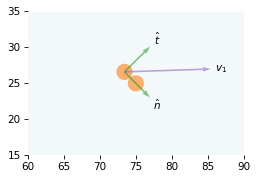

In [94]:
draw_collision(t_coll, cue, target, v1, v2)
plot_vector(n_hat, pos1, label='$\hat{n}$', scale=5, color="C2");
plot_vector(t_hat, pos1, label='$\hat{t}$', scale=5, color="C2");
plot_vector(v1, pos1, label='$v_1$', scale=1, color="C4");

Now we can compute the projection and rejection of `v1` on `n_hat`, noting that the rejection is also the projection of `v1` on `t_hat`.

In [95]:
v1_normal = vector_projection(v1, n_hat)
v1_tangent = v1 - v1_normal

Here's what those components look like.

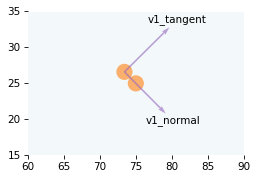

In [96]:
draw_collision(t_coll, cue, target, v1, v2)
plot_vectors([v1_normal, v1_tangent], [pos1, pos1],
             labels=['v1_normal', 'v1_tangent'], color="C4");

And we'll do the same for `v2`.
In this example, they are both zero, but we'll come back and change that later.

In [97]:
v2_normal = vector_projection(v2, n_hat)
v2_tangent = v2 - v2_normal

Now we can compute the velocities of both balls after the collision.
In this example, because the masses are the same, the velocities along the tangent vector are unchanged and the velocities along the normal vector are exchanged.

In [98]:
v1_after = v1_tangent + v2_normal
v2_after = v2_tangent + v1_normal

Here's what the velocities look like after the collision.

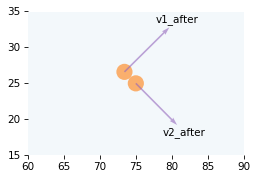

In [99]:
draw_collision(t_coll, cue, target, v1, v2)
plot_vectors([v1_after, v2_after], [pos1, pos2], 
             labels=['v1_after', 'v2_after'], color="C4");

Now let's see if the target ball goes in the pocket.
Since we already have a way to check for collisions, we'll create a virtual ball at the location of the pocket in the lower left corner -- with velocity zero.

In [100]:
pocket2 = np.array([table_width, 0])
v_pocket = np.array([0, 0])

If the target ball hits the pocket ball, it would go in the pocket.
In reality, that might be too generous.
To simulate a tighter pocket, we could make the last argument smaller than the diameter of the ball.
But let's keep it simple.

In [101]:
will_hit(pos2, pocket2, v2_after, v_pocket, ball_diameter)

True

And it does!
To see how close we are to the center of the pocket, we can compute the minimum distance between the target ball and the virtual ball. 

In [102]:
min_soln = minimize_distance(pos2, pocket2, v2_after, v_pocket)
min_soln.fun

0.1633

It's off by less than an inch, so that's good!

But we have a problem.
If the cue ball also goes in a pocket, the shot doesn't count.
So let's check whether the cue ball hits the pocket in the upper right corner.

In [103]:
pocket1 = np.array([table_width, table_height])
will_hit(pos1, pocket1, v1_after, v_pocket, ball_diameter)

True

Oops.

As an exercise, go back and adjust the angle of `v1` and see if you can find a value that puts the target ball in the pocket and keeps the cue ball on the table.

## Animation

In [104]:
lower = 0
upper = min_soln.x

args = (pos2, pocket2, v2_after, v_pocket, ball_diameter)
root_soln = root_scalar(error_func, bracket=[lower, upper], args=args, method="brentq")

In [105]:
t_sink = root_soln.root
t_sink

4.0576

In [106]:
t_total = t_coll + t_sink
ts = np.linspace(0, t_total, 150)
dt = t_total / len(ts) * 1000
dt

53.9635

In [107]:
cue_coll = cue + t_coll * v1
target_coll = target + t_coll * v2

In [108]:
def animate_frame(frame_num):
    t = ts[frame_num]

    if t < t_coll:
        pos1 = cue + t * v1
        pos2 = target + t * v2
    else:
        t2 = t - t_coll
        pos1 = cue_coll + t2 * v1_after
        pos2 = target_coll + t2 * v2_after
        
    cue_patch.center = pos1
    target_patch.center = pos2
    
    return cue_patch, target_patch

In [109]:
from matplotlib.patches import Circle

fig, ax = draw_table()

options = dict(radius=ball_diameter / 2, color="C1", alpha=0.8, lw=0)
cue_patch = Circle(cue, **options)
target_patch = Circle(target, **options)

ax.add_patch(cue_patch)
ax.add_patch(target_patch)

plt.close(fig)

In [110]:
import matplotlib.animation as animation

anim = animation.FuncAnimation(
    fig,
    animate_frame,
    frames=len(ts),
    interval=dt,
)

In [111]:
from IPython.display import HTML

HTML(anim.to_jshtml())

## Exercises


### Exercise

On some coin-operated pool tables, the cue ball is heavier than the target balls, which make it easier for the ball return mechanism to separate out the cue ball.
But some players find that this difference affects the behavior of the balls.
Let's see how much.

In the general case, where the masses of the two balls are $m_1$ and $m_2$, here's how we can compute the velocities of the balls after the collision.

$$
v_1' = v_1 - \frac{2 m_2}{m_1 + m_2} \operatorname{proj}_{\hat{n}}(v_1 - v_2)
$$

$$
v_2' = v_2 + \frac{2 m_1}{m_1 + m_2} \operatorname{proj}_{\hat{n}}(v_1 - v_2)
$$

where $\operatorname{proj}_{\hat{n}}(v_1 - v_2)$ is the vector projection of the relative velocity on `n_hat`.

Suppose the target ball is 6 ounces (168 g) and the cue ball is 6.7 ounces (188 g).
Compute the velocities of the balls after the collision and check to see whether the target still hits the pocket. Also compute the minimum distance between the target ball and the virtual ball in the pocket, and the time it takes to get there.

What difference does it make when the weights are different?

Hint: Check your solution by testing it with equal weights.

In [112]:
# Solution

m1 = 188
m2 = 168

proj = vector_projection(v1 - v2, n_hat)
v1_after_unequal = v1 - 2 * m2 / (m1 + m2) * proj
v2_after_unequal = v2 + 2 * m1 / (m1 + m2) * proj

v2_after, v2_after_unequal

(array([ 5.7434, -5.7967]), array([ 6.0661, -6.1223]))

In [113]:
# Solution

# The difference in masses changes the speeds after the collision,
# but not the direction (when the target ball is not moving)

cart2pol([v2_after, v2_after_unequal])

(array([8.1602, 8.6186]), array([-0.79, -0.79]))

In [114]:
# Solution

# So the ball still goes in the pocket

will_hit(pos2, pocket2, v2_after_unequal, v_pocket, ball_diameter)

True

In [115]:
# Solution

# It just gets there a little sooner

min_soln = minimize_distance(pos2, pocket2, v2_after_unequal, v_pocket)
min_soln.fun, min_soln.x

(0.1633, 4.1022)

In [116]:
# Solution

# Compared to the version with equal weights

min_soln = minimize_distance(pos2, pocket2, v2_after, v_pocket)
min_soln.fun, min_soln.x

(0.1633, 4.3326)

### Exercise

In pool it is not legal to take a shot while any of the balls on the table are still moving, but just for fun, go back and set `v2` to a non-zero velocity, and see if you can find a value of `v1` that pockets the target ball.

[Think Linear Algebra](https://allendowney.github.io/ThinkLinearAlgebra/index.html)

Copyright 2025 [Allen B. Downey](https://allendowney.com)

Code license: [MIT License](https://mit-license.org/)

Text license: [Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International](https://creativecommons.org/licenses/by-nc-sa/4.0/)